#### [ Fashion MNIST 실습 ]

##### [1] 데이터 준비 및 확인
[1-1] 데이터 로딩

In [35]:
from tensorflow.keras.datasets.fashion_mnist import load_data

import numpy as np

In [36]:
np.set_printoptions(floatmode='fixed', suppress=True)

In [37]:
(X_tr, y_tr), (X_te, y_te) = load_data()

In [38]:
X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

[1-2] 데이터 전처리
- 픽셀값 0 ~ 255 --> 0.0 ~ 1.0

In [39]:
X_tr = X_tr / X_tr.max()

In [40]:
X_te = X_te / X_te.max()

##### [2] 모델 생성

[2-1] 모델 설계

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [42]:
model = Sequential(name='My_model')

In [43]:
# 입력층
model.add(Flatten(input_shape=(28, 28)))

In [44]:
# 은닉층
model.add(Dense(50, activation='relu'))

In [45]:
# 출력층
model.add(Dense(10,
                activation='softmax'))

In [46]:
model.summary()

Model: "My_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


[2-2] 모델 설계

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics='acc')

##### [3] 학습

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [49]:
from datetime import datetime

In [50]:
FILEPATH = f'./save_model_{datetime.now().ctime()}.ckp'

In [51]:
modelCB = ModelCheckpoint(filepath=FILEPATH, monitor='val_accuracy', save_best_only=True)

In [52]:
stopCB = EarlyStopping(monitor='val_accuracy', patience=2)

In [53]:
model.fit(X_tr, y_tr,
          epochs=10,
          validation_split=0.2,
          callbacks=[modelCB, stopCB])

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5576 - acc: 0.8077 - val_loss: 0.4615 - val_acc: 0.8333
Epoch 2/10
1500/1500 [==============================] - 1s 977us/step - loss: 0.4125 - acc: 0.8539 - val_loss: 0.3929 - val_acc: 0.8617
Epoch 3/10
1500/1500 [==============================] - 1s 924us/step - loss: 0.3703 - acc: 0.8673 - val_loss: 0.3742 - val_acc: 0.8682
Epoch 4/10
1500/1500 [==============================] - 1s 935us/step - loss: 0.3487 - acc: 0.8758 - val_loss: 0.3749 - val_acc: 0.8733
Epoch 5/10
1500/1500 [==============================] - 1s 968us/step - loss: 0.3327 - acc: 0.8806 - val_loss: 0.3684 - val_acc: 0.8746
Epoch 6/10
1500/1500 [==============================] - 1s 962us/step - loss: 0.3197 - acc: 0.8854 - val_loss: 0.3658 - val_acc: 0.8762
Epoch 7/10
1500/1500 [==============================] - 1s 935us/step - loss: 0.3116 - acc: 0.8895 - val_loss: 0.3536 - val_acc: 0.8785
Epoch 8/10
1500/1500 [============================

### =============================================================================

In [79]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [80]:
fashion_mnist = keras.datasets.fashion_mnist

In [81]:
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

In [82]:
X_tr.shape

(60000, 28, 28)

In [83]:
y_tr.shape

(60000,)

In [84]:
y_tr

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [85]:
X_val, X_tr = X_tr[:5000] / 255., X_tr[5000:] / 255.
y_val, y_tr = y_tr[:5000], y_tr[5000:]
X_te = X_te / 255.

In [86]:
X_tr[0].shape

(28, 28)

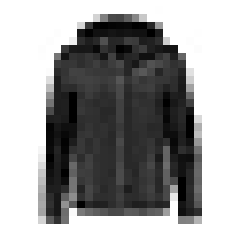

In [87]:
plt.imshow(X_tr[0], cmap='binary')
plt.axis('off')
plt.show()

In [88]:
y_tr

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [89]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [90]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [91]:
model.layers

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [93]:
X_tr[:1, :, :].shape

(1, 28, 28)

In [94]:
flattend = model.get_layer(index=0)(X_tr[:1, :, :])
flattend.shape

TensorShape([1, 784])

In [95]:
output1 = model.layers[1](flattend)
output1.shape

TensorShape([1, 300])

In [96]:
output2 = model.layers[2](output1)
output2.shape

TensorShape([1, 100])

In [98]:
# 마지막 dense layer 를 통과하면 최종 출력은 10개의 값
output3 = model.layers[3](output2)
output3

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.16140863, 0.06310740, 0.05619984, 0.08991790, 0.05030208,
        0.13712659, 0.04887259, 0.25976074, 0.09515049, 0.03815374]],
      dtype=float32)>

In [99]:
keras.utils.plot_model(model, 'My_fashion_mnist_model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
